# Hello World!

In this notebook, we built our first Hello World application.

The application first entangled two qubits which were initially in the state $\vert00\rangle$. Then, we noted the results by running the application on a simulator as well as real quantum hardware at IBM.

# Building the circuit

We begin by importing Qiskit.

In [2]:
from qiskit import *

In the video, we initialized two qubits into a `QuantumRegister` and two classical bits into a `ClassicalRegister` by writing

In [3]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

Then we built a `QuantumCircuit` composed of the two classical and quantum bits by saying

In [4]:
circuit = QuantumCircuit(qr, cr)

The above three lines of code can be simplified into one line by writing

In [5]:
circuit = QuantumCircuit(2,2)

where the first argument is the number of quantum bits, and the second argument is the number of classical bits. This is the recommended way of creating circuits.

Once you create your circuit, you can draw it at any point by writing

In [6]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

For a plot based on `matplotlib`, use instead

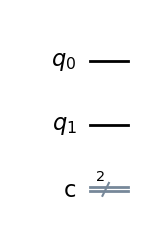

In [7]:
%matplotlib inline 
circuit.draw(output='mpl')

Note that you only need to run the `%matplotlib inline` command once in your notebook.

Next, let's add the gates.

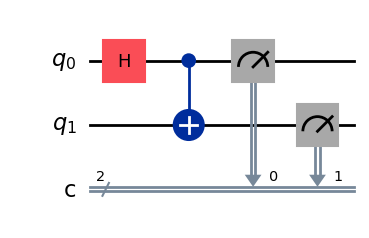

In [8]:
# the quantum circuit has two qubits. they are indexed as qubits 0 and 1
circuit.h(0)
circuit.cx(0,1) # order is control, target
circuit.measure([0,1], [0,1]) # qubits [0,1] are measured and results are stored in classical bits [0,1] in order
circuit.draw(output='mpl')

# Running on a simulator

We begin by setting the simulator to `qasm_simulator` from the Aer element of Qiskit.

In [12]:
from qiskit_aer import Aer
simulator = Aer.get_backend('qasm_simulator')

Then, we execute the circuit on the simulator and store the results in a variable called `result`.

In [18]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit, shots=1024)
result = job.result()

At this point, we are ready to plot the results of the simulator execution. To do this, first import the visualization tools from Qiskit using

In [15]:
from qiskit.visualization import plot_histogram

Then, we plot the results using

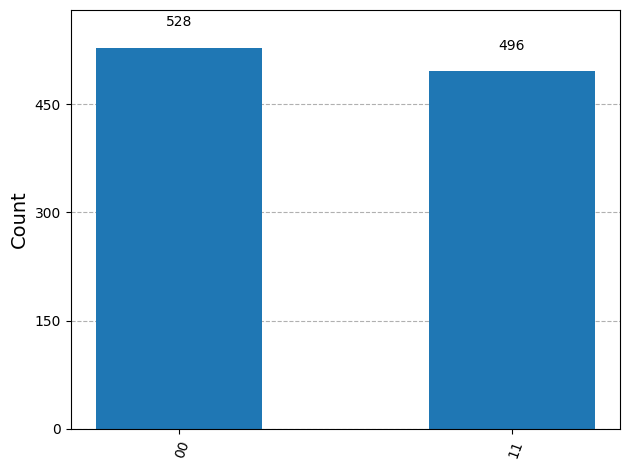

In [19]:
plot_histogram(result.get_counts(circuit))

# Running on real quantum hardware

In order to run the circuit on real quantum hardware at IBM, we begin by loading our saved IBMQ account using

In [7]:
# ! pip install qiskit-ibmq-provider
# ! pip install qiskit-ibm-runtime

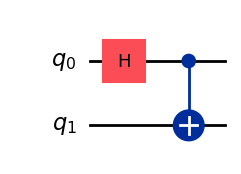

In [10]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

In [11]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Cloud account.
QiskitRuntimeService.save_account(channel="ibm_cloud", token="SaAk9g-VMWyyku6nxro0LPqWl3MzfjyBbS5_qH6eOEC7", instance="elm")

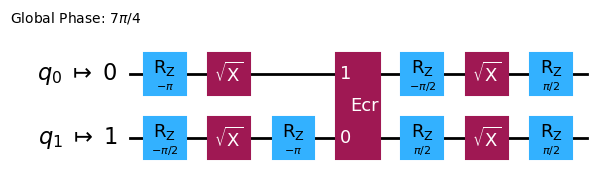

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

In [13]:
# Construct the Estimator instance.
 
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d2i1mhmactes73f5qb60


In [14]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Cloud account.
QiskitRuntimeService.save_account(channel="ibm_cloud", token="SaAk9g-VMWyyku6nxro0LPqWl3MzfjyBbS5_qH6eOEC7", instance="elm")

In [15]:
# service = QiskitRuntimeService()
# provider = service.get_provider(hub = 'ibm-q')

Then, we choose the backend that we want to use in our run. In the video, we used

In [16]:
# qcomp = provider.get_backend('ibmq_16_melbourne')

Generally, if you have no preference on which backend you'd like to use, you can just ask for the least busy backend by using

In [15]:
num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_16_melbourne


Once the backend is selected, we are ready to run the circuit just as before using the `execute` function. Before doing so, a useful feature is to run the job watcher that is available in the latest version of Qiskit using

In [ ]:
import qiskit.tools.jupyter
%qiskit_job_watcher

In [17]:
job = execute(circuit, backend=qcomp)

You can also monitor the job progress inline using the job monitor:

In [18]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


Once the job runs sucessfully, we can visualize the results using `plot_histogram` as before using

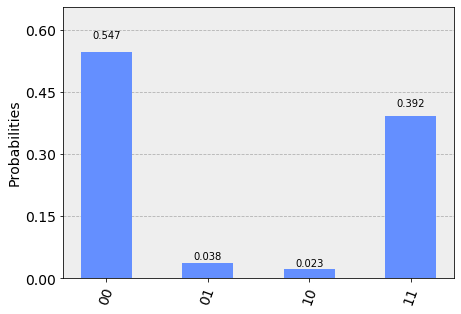

In [19]:
result = job.result()
plot_histogram(result.get_counts(circuit))

You can close the job watcher window by using

In [20]:
%qiskit_disable_job_watcher

# References

For detailed information about Qiskit, check out the tutorials in the Github repository:

https://github.com/Qiskit/qiskit-iqx-tutorials

# Version

It's good to note the Qiskit version that was used in your work. One way to do this is print the version at the bottom of the Jupyter notebook using

In [21]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

In [22]:
%qiskit_copyright